# Home Assignment 1: Deep Learning from Scratch

**Authors:** Yoav Elem and Amir Solimani

## Introduction

In this assignment, we will be implementing deep learning algorithms from scratch. Before we begin, let's set up our environment by downloading the necessary packages and performing the required imports.

In [1]:
!pip install -r requirements.txt

In [3]:
from layers import ReLULayer, TanhLayer
from losses import LinearLayer, SoftmaxLayer
from neural_network import GenericNetwork
from utils import plot_loss_and_accuracy, plot_data, SGD

import numpy as np
import matplotlib.pyplot as plt
import scipy.io


# Set numpy print options
np.set_printoptions(precision=10, suppress=True)

# Load the datasets
swiss_roll =scipy.io.loadmat('HW1_Data(1)/SwissRollData.mat')
peaks =scipy.io.loadmat('HW1_Data(1)/PeaksData.mat')
gmm = scipy.io.loadmat('HW1_Data(1)/GMMData.mat')

## 2.1.1 Softmax Layer and Gradient Test

In this section, we created the softmax loss layer. The code for the implementation of the layer and the gradient test can be found [here](losses.py).

We will now demonstrate that the layer passes the gradient test.

More specifically, we will generate a random vector $ \mathbf{d} $ where $ \|\mathbf{d}\| = 1 $. We will test the following:

- **First Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x})\| $

- **Second Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x}) - \epsilon \mathbf{d}^\top \nabla_\mathbf{x} \text{softmax}(\mathbf{x})\| $

The decay of epsilon is defined by the formula: $ \epsilon_t = 0.5^t $. In our plots, the x-axis represents the value of $ t $, and the y-axis shows the error measured in both first and second order errors.
note that the errors are presented in log-scale

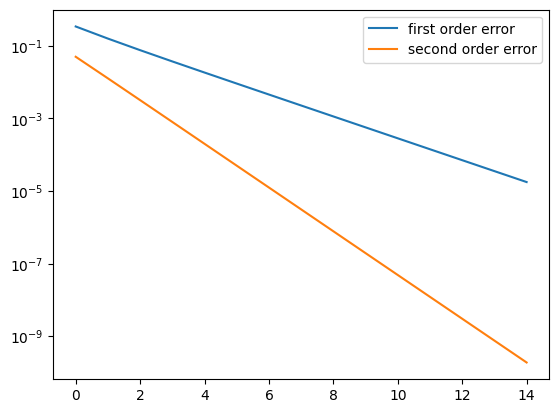

In [4]:
softmax_layer = SoftmaxLayer(4, 4)
x = np.random.rand(4, 1)
y = np.array([[0, 0, 0, 1]]).T

# Tests the gradient of the softmax layer as presented in the notes
softmax_layer.grad_test_x(x, y)

# 2.1.2 Minimizing an SGD Objective Function

## Overview
In this task, we delve into the implementation and application of Stochastic Gradient Descent (SGD) for optimizing a specific objective function. The goal is to demonstrate the effectiveness of SGD in practical scenarios.

## Task Description
We will be coding an SGD algorithm and showcasing its operational success. As recommended in our class, the approach involves creating a linear classifier that aims to approximate the identity function. This is formulated as:

$$
Wx + b = x
$$

Here, $x$ is a randomly sampled vector, and we seek to find the weights $W$ and bias $b$ such that the output mirrors the identity function. The key component of this task is the utilization of a linear layer, which is intricately linked with a loss function, thereby classifying it as a loss layer.

The SGD optimization will be performed with a learning rate $\text{lr} = 5 \times 10^{-3}$, adhering to the SGD methodology presented in class. 

For details on the implementation of the SGD function, please refer to [this link](neural_network.py). We will be using a neural network model, as outlined [here](neural_network.py). The generic SGD we created is designed to operate within a neural network context, but for this task, we will configure it as a single-layer linear neural network. This adaptation makes it perfectly suitable for our objective of approximating the identity function.


Epoch 0, training loss: 0.2373644856374045
Epoch 0, training accuracy: 0.0
Epoch 0, validation loss: 0.2373644856374045
Epoch 0, validation accuracy: 0.0
Epoch 1, training loss: 0.2277525020300097
Epoch 1, training accuracy: 0.0
Epoch 1, validation loss: 0.2277525020300097
Epoch 1, validation accuracy: 0.0
Epoch 2, training loss: 0.21852975200412872
Epoch 2, training accuracy: 0.0
Epoch 2, validation loss: 0.21852975200412872
Epoch 2, validation accuracy: 0.0
Epoch 3, training loss: 0.20968047369549225
Epoch 3, training accuracy: 0.0
Epoch 3, validation loss: 0.20968047369549225
Epoch 3, validation accuracy: 0.0
Epoch 4, training loss: 0.20118954351046617
Epoch 4, training accuracy: 0.0
Epoch 4, validation loss: 0.20118954351046617
Epoch 4, validation accuracy: 0.0
Epoch 5, training loss: 0.19304245027952707
Epoch 5, training accuracy: 0.0
Epoch 5, validation loss: 0.19304245027952707
Epoch 5, validation accuracy: 0.0
Epoch 6, training loss: 0.18522527045738388
Epoch 6, training accura

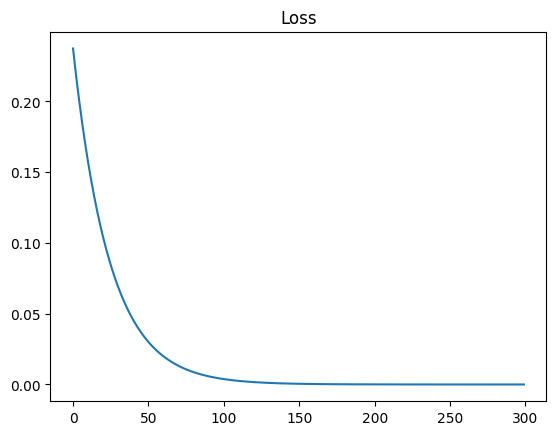

In [5]:
# define learning rate
lr = 5e-3

# generate a random input vector
x = np.random.rand(3, 1)

# define the target vector
y = x

# define the linear layer
linear_layer = GenericNetwork(LinearLayer(3, 3)) 

# Run the SGD algorithm
loss, _, _, _ = SGD(x, y, x, y, linear_layer, lr, epochs=300)

# plot the loss
plt.plot(loss)
plt.title('Loss')
plt.show()

Epoch 0, training loss: 0.693297216648025
Epoch 0, training accuracy: 0.49755
Epoch 0, validation loss: 0.6933460869940994
Epoch 0, validation accuracy: 0.4922
Epoch 1, training loss: 0.6935267936171862
Epoch 1, training accuracy: 0.50575
Epoch 1, validation loss: 0.6927405974900801
Epoch 1, validation accuracy: 0.5234
Epoch 2, training loss: 0.6934590431961188
Epoch 2, training accuracy: 0.50575
Epoch 2, validation loss: 0.693201161077431
Epoch 2, validation accuracy: 0.5108
Epoch 3, training loss: 0.6931568083001488
Epoch 3, training accuracy: 0.49765
Epoch 3, validation loss: 0.6932101358135293
Epoch 3, validation accuracy: 0.4944
Epoch 4, training loss: 0.6934501320641111
Epoch 4, training accuracy: 0.5114
Epoch 4, validation loss: 0.6930001845629293
Epoch 4, validation accuracy: 0.5114
Epoch 5, training loss: 0.693342506764998
Epoch 5, training accuracy: 0.5063
Epoch 5, validation loss: 0.6929427842499606
Epoch 5, validation accuracy: 0.5178
Epoch 6, training loss: 0.6933149277588

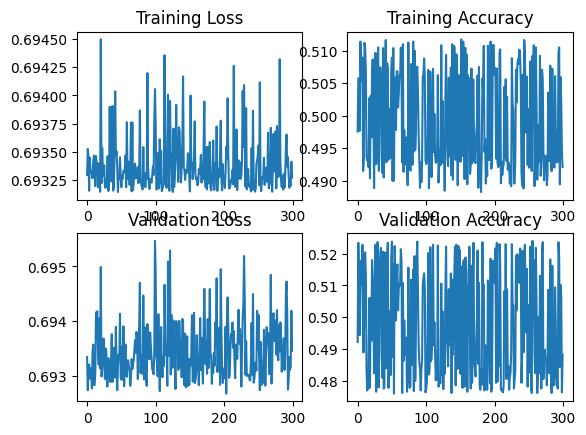

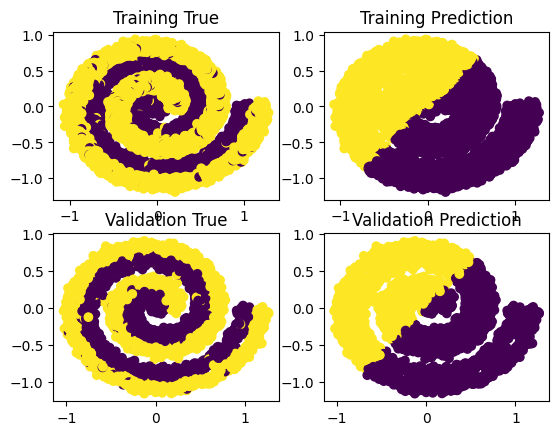

In [5]:
lr = 5e-3
dataset = swiss_roll

Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']

# define the network
network = GenericNetwork(SoftmaxLayer(2, 2))

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)

# plot the loss and accuracy
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)
plot_data(network, Xt, Yt, Xv, Yv)


### Task 2.2.1

In this task, we are required to implement the neural network with the forward and backward pass. The code for the `GenericNetwork` class can be found [here](neural_network.py).

Below we plotted the results of the Jacobian test on the `tanh` layer we created. The implementation of which can be found [here](layers.py).


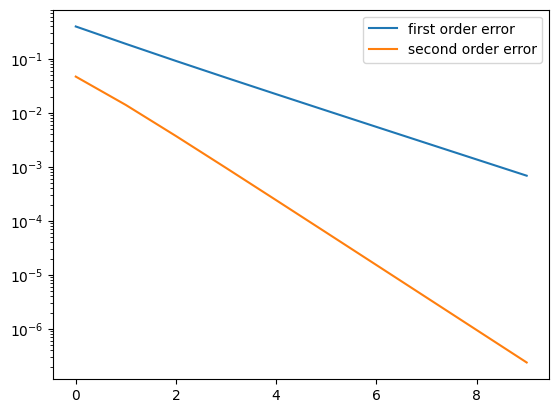

In [6]:
tanh_layer = TanhLayer(3, 4)
x = np.array([[1,2,3]]).T
tanh_layer.JacobianTest(x)

2.1.4

Epoch 0, training loss: 2.8756202986516315
Epoch 0, training accuracy: 0.6282
Epoch 0, validation loss: 2.890405872087864
Epoch 0, validation accuracy: 0.6262
Epoch 1, training loss: 1.9569276554745179
Epoch 1, training accuracy: 0.5329
Epoch 1, validation loss: 1.9549822663065228
Epoch 1, validation accuracy: 0.537
Epoch 2, training loss: 1.891299951197732
Epoch 2, training accuracy: 0.6102
Epoch 2, validation loss: 1.9014559730297869
Epoch 2, validation accuracy: 0.6122
Epoch 3, training loss: 1.8876242337624276
Epoch 3, training accuracy: 0.52125
Epoch 3, validation loss: 1.8753389099475894
Epoch 3, validation accuracy: 0.5214
Epoch 4, training loss: 2.0299849164205206
Epoch 4, training accuracy: 0.5174
Epoch 4, validation loss: 2.0087015610448957
Epoch 4, validation accuracy: 0.5168
Epoch 5, training loss: 1.6171525474784212
Epoch 5, training accuracy: 0.64795
Epoch 5, validation loss: 1.6295852526146553
Epoch 5, validation accuracy: 0.6492
Epoch 6, training loss: 1.244711138571867

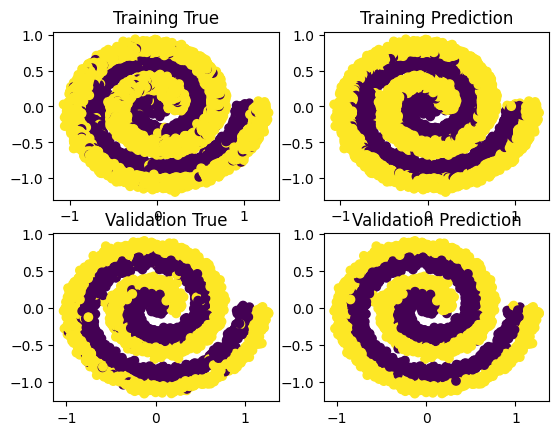

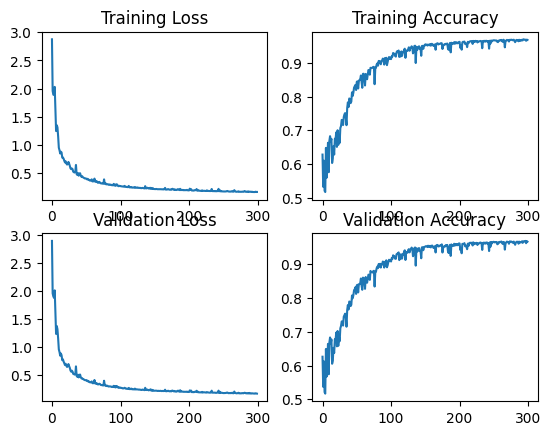

In [11]:
dataset = swiss_roll
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 2),
layers = [
    ReLULayer(2, 128),
    ReLULayer(128, 128)
],
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)


Epoch 0, training loss: 3.6844950088900705
Epoch 0, training accuracy: 0.723
Epoch 0, validation loss: 4.166922908170494
Epoch 0, validation accuracy: 0.71888
Epoch 1, training loss: 3.093170527198277
Epoch 1, training accuracy: 0.74924
Epoch 1, validation loss: 3.5198238798623493
Epoch 1, validation accuracy: 0.74464
Epoch 2, training loss: 2.6162648099367916
Epoch 2, training accuracy: 0.75372
Epoch 2, validation loss: 2.9716276708379166
Epoch 2, validation accuracy: 0.74704
Epoch 3, training loss: 2.583748266239678
Epoch 3, training accuracy: 0.78076
Epoch 3, validation loss: 2.9888254303091135
Epoch 3, validation accuracy: 0.77232
Epoch 4, training loss: 3.6991903221927545
Epoch 4, training accuracy: 0.6256
Epoch 4, validation loss: 3.933982596398958
Epoch 4, validation accuracy: 0.6328
Epoch 5, training loss: 2.0305372187043127
Epoch 5, training accuracy: 0.77316
Epoch 5, validation loss: 2.269673626233589
Epoch 5, validation accuracy: 0.76848
Epoch 6, training loss: 2.24277257409

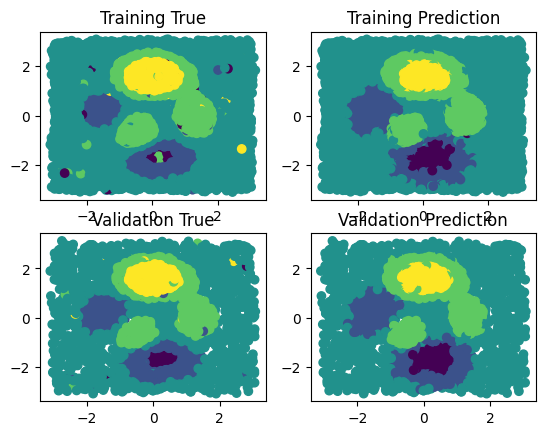

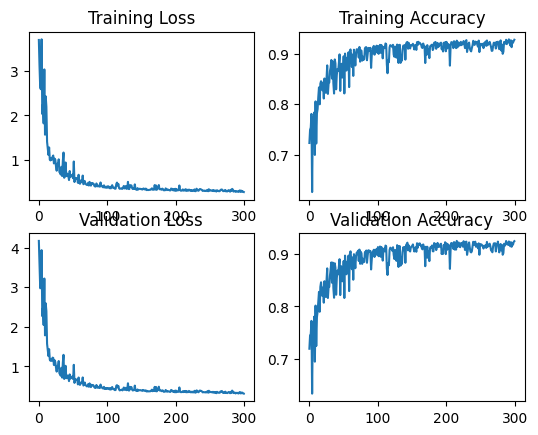

In [13]:
dataset = peaks
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(2, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

In [14]:
dataset = gmm
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(5, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)

Epoch 0, training loss: 4.602336027434295
Epoch 0, training accuracy: 0.68192
Epoch 0, validation loss: 4.5929696526964
Epoch 0, validation accuracy: 0.68352
Epoch 1, training loss: 2.718461484977958
Epoch 1, training accuracy: 0.78004
Epoch 1, validation loss: 2.7329841425028847
Epoch 1, validation accuracy: 0.78128
Epoch 2, training loss: 2.107779507523247
Epoch 2, training accuracy: 0.83508
Epoch 2, validation loss: 2.1230535831796793
Epoch 2, validation accuracy: 0.8296
Epoch 3, training loss: 1.823805906475121
Epoch 3, training accuracy: 0.85936
Epoch 3, validation loss: 1.8428854386051339
Epoch 3, validation accuracy: 0.85472
Epoch 4, training loss: 1.6573380412828034
Epoch 4, training accuracy: 0.8736
Epoch 4, validation loss: 1.6720790396451117
Epoch 4, validation accuracy: 0.87568
Epoch 5, training loss: 1.5703017778343635
Epoch 5, training accuracy: 0.87932
Epoch 5, validation loss: 1.5651014682622435
Epoch 5, validation accuracy: 0.87888
Epoch 6, training loss: 1.43717476979